In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
%matplotlib inline
import re
from os import listdir
from os.path import isfile, join

In [2]:
def AverageMetrics(df, polList):
    output = pd.DataFrame(columns=['Policy','Trial','Force','Blame','Time'])
    for policy in polList:
        for trial in range(2,20,2):
            data = df[df['Policy'] == policy]
            data = data[data['Human Count'] == trial]
            blame = data['Blame'].mean()
            force = data['Force'].mean()
            time = data['Total Time'].mean()
            entry = [policy, trial, force, blame, time]
            output.loc[len(output)] = entry 
    return output

In [36]:
# Load Data
fullDf = pd.read_csv("adapt_metrics_1.csv")
fullTime = pd.read_csv("adapt_time_1.csv")
#polList = ['Greedy', 'Nice', 'Baseline', 'Reference']
polList = ['Greedy', 'Nice', 'GreedyToNice-D', 'GreedyToNice-S', 'NiceToGreedy-D', 'NiceToGreedy-S']
averageDf = AverageMetrics(fullDf, polList)

In [4]:
# Setup SNS settings
sns.set_style("darkgrid")
columnwidth = 3.40067
linewidth = 7.00137
sns.set_context("paper", rc={"font.size":2,"axes.titlesize":2,"axes.labelsize":8})   

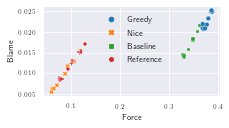

In [5]:
# Force/Blame Scatter Plot
plot = sns.scatterplot(data=averageDf, x="Force", y="Blame", hue="Policy", style="Policy", legend="brief")

# Plot Settings
plt.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(w=0.40*linewidth, h=0.2*linewidth)
plot.legend(loc=9, frameon=False)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.setp(plot.get_legend().get_texts(), fontsize='8') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='10') # for legend title

# Save Plot to File
plt.savefig('/home/jaholtz/code/amrl-papers/ICRA2021/social-ldips/images/simForceBlame.pgf', bbox_inches = "tight")

[None, None]

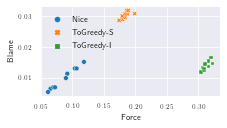

In [37]:
# Force/Blame Scatter Plot
nice_1 = averageDf[averageDf["Policy"] == "Nice"]
nice_2 = averageDf[averageDf["Policy"] == "NiceToGreedy-S"]
nice_3 =averageDf[averageDf["Policy"] == "NiceToGreedy-D"]
niceData = pd.concat([nice_1, nice_2, nice_3])
niceData = niceData.replace("NiceToGreedy-S", "ToGreedy-S")
niceData = niceData.replace("NiceToGreedy-D", "ToGreedy-I")

plot = sns.scatterplot(data=niceData, x="Force", y="Blame", hue="Policy", style="Policy", legend="brief")

# Plot Settings
plt.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(w=0.40*linewidth, h=0.2*linewidth)
plot.legend(loc=2, frameon=False)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.setp(plot.get_legend().get_texts(), fontsize='8') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='10') # for legend title

# Save Plot to File
plt.savefig('/home/jaholtz/code/amrl-papers/ICRA2021/social-ldips/images/adaptedNiceForceBlame.pgf', bbox_inches = "tight")

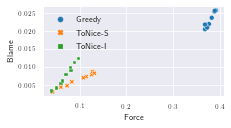

In [38]:
# Force/Blame Scatter Plot
greedy_1 = averageDf[averageDf["Policy"] == "Greedy"]
greedy_2 = averageDf[averageDf["Policy"] == "GreedyToNice-S"]
greedy_3 = averageDf[averageDf["Policy"] == "GreedyToNice-D"]
greedyData = pd.concat([greedy_1, greedy_2, greedy_3])
greedyData = greedyData.replace("GreedyToNice-S", "ToNice-S")
greedyData = greedyData.replace("GreedyToNice-D", "ToNice-I")

plot = sns.scatterplot(data=greedyData, x="Force", y="Blame", hue="Policy", style="Policy", legend="brief")

# Plot Settings
plt.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(w=0.40*linewidth, h=0.2*linewidth)
plot.legend(loc=2, frameon=False)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.setp(plot.get_legend().get_texts(), fontsize='8') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='10') # for legend title

# Save Plot to File
plt.savefig('/home/jaholtz/code/amrl-papers/ICRA2021/social-ldips/images/adaptedGreedyForceBlame.pgf', bbox_inches = "tight")

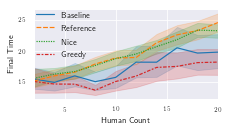

In [35]:
# Time Line Graph   
plot = sns.lineplot(x="Human Count", y="Final Time", hue="Policy", style="Policy", data=fullTime, legend="brief");

# Plot Settings
plt.xlim(2, 20)
plt.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(w=0.40*linewidth, h=0.2*linewidth)
plot.legend(loc=2, bbox_to_anchor=(-0.03, 1.08), frameon=False)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.setp(plot.get_legend().get_texts(), fontsize='8') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='10') # for legend title

# Save Plot to File
plt.savefig('/home/jaholtz/code/amrl-papers/ICRA2021/social-ldips/images/simTime.pgf', bbox_inches = "tight")

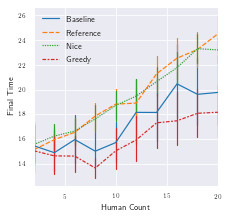

In [9]:
# Time Line Graph   
plot = sns.lineplot(x="Human Count", y="Final Time", hue="Policy", style="Policy", data=fullTime, legend="brief", err_style="bars");

# Plot Settings
plt.xlim(2, 20)
plt.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(w=0.40*linewidth, h=0.4*linewidth)
plot.legend(loc=2, frameon=False)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.setp(plot.get_legend().get_texts(), fontsize='8') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='10') # for legend title

# Save Plot to File
plt.savefig('/home/jaholtz/code/amrl-papers/ICRA2021/social-ldips/images/adaptedTime.pgf', bbox_inches = "tight")

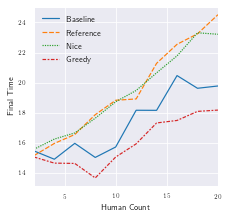

In [14]:
# Time Line Graph   
plot = sns.lineplot(x="Human Count", y="Final Time", hue="Policy", style="Policy", data=fullTime, legend="brief", err_style="bars", ci = None);

# Plot Settings
plt.xlim(2, 20)
plt.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(w=0.40*linewidth, h=0.4*linewidth)
plot.legend(loc=2, bbox_to_anchor=(-0.03, 1.08), frameon=False)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.setp(plot.get_legend().get_texts(), fontsize='8') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='10') # for legend title

# Save Plot to File
plt.savefig('/home/jaholtz/code/amrl-papers/ICRA2021/social-ldips/images/adaptedTime.pgf', bbox_inches = "tight")

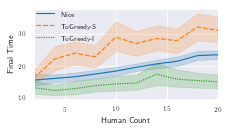

In [32]:
# Time Line Graph   
nice_1 = fullTime[fullTime["Policy"] == "Nice"]
nice_2 = fullTime[fullTime["Policy"] == "NiceToGreedy-S"]
nice_3 = fullTime[fullTime["Policy"] == "NiceToGreedy-D"]
niceData = pd.concat([nice_1, nice_2, nice_3])
niceData = niceData.replace("NiceToGreedy-S", "ToGreedy-S")
niceData = niceData.replace("NiceToGreedy-D", "ToGreedy-I")

plot = sns.lineplot(x="Human Count", y="Final Time", hue="Policy", style="Policy", data=niceData, legend="brief");

# Plot Settings
plt.xlim(2, 20)
plt.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(w=0.40*linewidth, h=0.2*linewidth)
plot.legend(loc=2, bbox_to_anchor=(-0.03, 1.08), frameon=False)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.setp(plot.get_legend().get_texts(), fontsize='7') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='10') # for legend title

# Save Plot to File
plt.savefig('/home/jaholtz/code/amrl-papers/ICRA2021/social-ldips/images/adaptedNiceTime.pgf', bbox_inches = "tight")

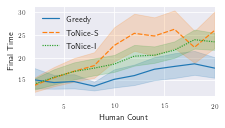

In [18]:
# Time Line Graph   
greedy_1 = fullTime[fullTime["Policy"] == "Greedy"]
greedy_2 = fullTime[fullTime["Policy"] == "GreedyToNice-S"]
greedy_3 = fullTime[fullTime["Policy"] == "GreedyToNice-D"]
greedyData = pd.concat([greedy_1, greedy_2, greedy_3])
greedyData = greedyData.replace("GreedyToNice-S", "ToNice-S")
greedyData = greedyData.replace("GreedyToNice-D", "ToNice-I")


plot = sns.lineplot(x="Human Count", y="Final Time", hue="Policy", style="Policy", data=greedyData, legend="brief");

# Plot Settings
plt.xlim(2, 20)
plt.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(w=0.40*linewidth, h=0.2*linewidth)
plot.legend(loc=2, frameon=False)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.setp(plot.get_legend().get_texts(), fontsize='8') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='10') # for legend title

# Save Plot to File
plt.savefig('/home/jaholtz/code/amrl-papers/ICRA2021/social-ldips/images/adaptedGreedyTime.pgf', bbox_inches = "tight")

In [ ]:
# This box contains everything for loading the door scenarios from sim

def load_eval(path):
    types = {'robot_state': str}
    df = pd.read_json(path, dtype=types)
    lowest_time = df['time_secs'][0] + 1e-9 * df['time_nsecs'][0]
    relative_times = df['time_secs'] + 1e-9 * df['time_nsecs'] - lowest_time
    df['relative_time'] = relative_times
    return df

fileRe = re.compile(r"\w+\.\w+_\w+\.\w+_hc\.(\d+)_(\d+)\.json")
startIter = 0
endIter = 24
def CollectData(dirPath, label):
    start = True
    output = None
    times = {'Human Count': [], 'Final Time': [], 'Policy': []}
    onlyFiles = [f for f in listdir(dirPath) if isfile(join(dirPath, f))]
    for file in onlyFiles:
        match = fileRe.match(file)
        humans = int(match.group(1))
        iteration = int(match.group(2))
        #humans = int(file.split('.')[-2])
        if (iteration >= startIter and iteration <= endIter):
            df = load_eval(dirPath + file)
            hColumn = [humans] * len(df.index)
            labelColumn = [label] * len(df.index)
            finalTime = df['relative_time'].iloc[-1]
            timeColumn = [finalTime] * len(df.index)
            times['Human Count'].append(humans)
            times['Final Time'].append(finalTime)
            times['Policy'].append(label)
            df['Human Count'] = hColumn
            df['Policy'] = labelColumn
            df['Total Time'] = timeColumn
            if (start):
                output = df
            else:
                output = pd.concat([output, df], axis=0)
            start = False
    print(len(output))
    return output, pd.DataFrame.from_dict(times)

def CountSuccess(dataDict, timeout):
    output = None
    for key, value in dataDict.items():
        score = 0
        for entry in value:
            time = entry['relative_time'].iloc[-1]
            if (time < timeout):
                score += 1
        output[key] = score
    return output

goAloneDf, goAloneTimes = CollectData(f'/home/jaholtz/code/docker/sldips/results_door2/nice_door/', 'NiceDoor')
referenceDf, referenceTimes = CollectData(f'/home/jaholtz/code/docker/sldips/results_door2/greedy_door/', 'GreedyDoor')
niceDf, niceTimes = CollectData(f'/home/jaholtz/code/docker/sldips/results_door2/nice/', 'Nice')
greedyDf, greedyTimes = CollectData(f'/home/jaholtz/code/docker/sldips/results_door2/greedy/', 'Greedy')

gaSort = goAloneTimes.sort_values(goAloneTimes.columns[0])
referenceSort = referenceTimes.sort_values(referenceTimes.columns[0])
niceSort = niceTimes.sort_values(niceTimes.columns[0])
greedySort = greedyTimes.sort_values(greedyTimes.columns[0])
fullTime = pd.concat([gaSort,referenceSort], axis=0)
fullTime = pd.concat([fullTime,niceSort], axis=0)
fullTime = pd.concat([fullTime,greedySort], axis=0)

print("Total Trials: " + str(len(gaSort.index)))
gaTimeouts = gaSort[gaSort["Final Time"] > 60.0]
print("NiceDoor: " + str(len(gaTimeouts.index)))
referenceTimeouts = referenceSort[referenceSort["Final Time"] > 60.0]
print("GreedyDoor: " + str(len(referenceTimeouts.index)))
niceTimeouts = niceSort[niceSort["Final Time"] > 60.0]
print("Nice: " + str(len(niceTimeouts.index)))
greedyTimeouts = greedySort[greedySort["Final Time"] > 60.0]
print("Greedy: " + str(len(greedyTimeouts.index)))

In [ ]:
title = ["Policy", "Human Count", "Failures"]
rows = []
for i in range(2,20,2):
    ga_count = gaTimeouts[gaTimeouts["Human Count"] == i]
    ref_count = referenceTimeouts[referenceTimeouts["Human Count"] == i]
    n_count = niceTimeouts[niceTimeouts["Human Count"] == i]
    g_count = greedyTimeouts[greedyTimeouts["Human Count"] == i]
    ga = ["NiceDoor", i, len(ga_count.index)]
    r = ["GreedyDoor", i, len(ref_count.index)]
    n = ["Nice", i, len(n_count.index)]
    g = ["Greedy", i, len(g_count.index)]
    rows.append(ga)
    rows.append(r)
    rows.append(n)
    rows.append(g)
failures = pd.DataFrame(rows, columns=title)

In [ ]:
plot = sns.lineplot(x="Human Count", y="Failures", hue="Policy", style="Policy", data=failures, legend="brief");

# Plot Settings
plt.xlim(2, 20)
plt.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(w=0.40*linewidth, h=0.2*linewidth)
plot.legend(loc=7, bbox_to_anchor=(1.0, 0.6), frameon=False)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.setp(plot.get_legend().get_texts(), fontsize='8') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='10') # for legend title
plt.savefig('/home/jaholtz/code/amrl-papers/ICRA2021/social-ldips/images/doorFailures.pgf', bbox_inches = "tight")